---

## Section 1: Deriving a Regression Line

---

Suppose we have 3 points: $(x_1, y_1), (x_2, y_2), (x_3, y_3)$. These points represent some relationship between the indendent variable $x$ (the feature) and the dependent variable $y$ (the response). 

Suppose further that we have some reason to suspect a linear relationship between the feature and the response. How could we go about modeling this?

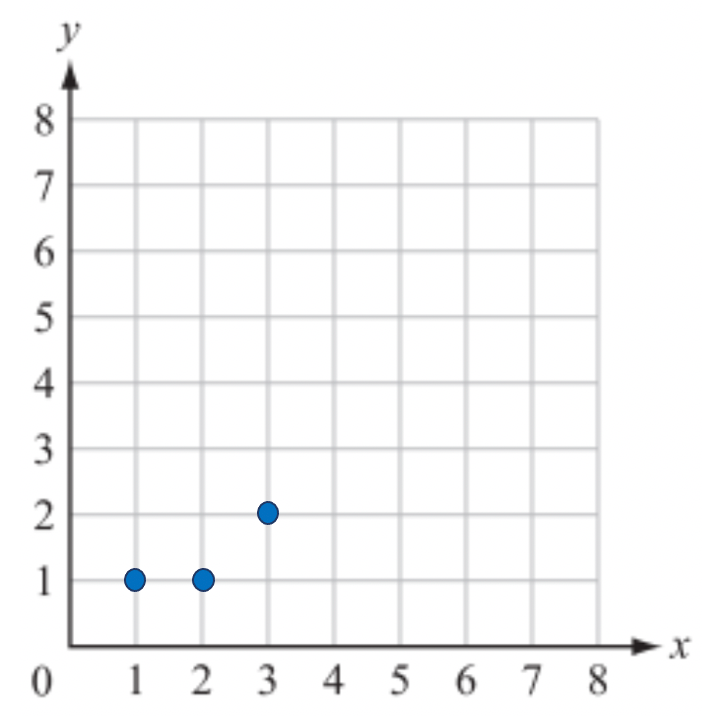

Consider the following figures showing three separate linear functions plotted next to the original 3 data points. Which one is best? How could we quantify "best"?


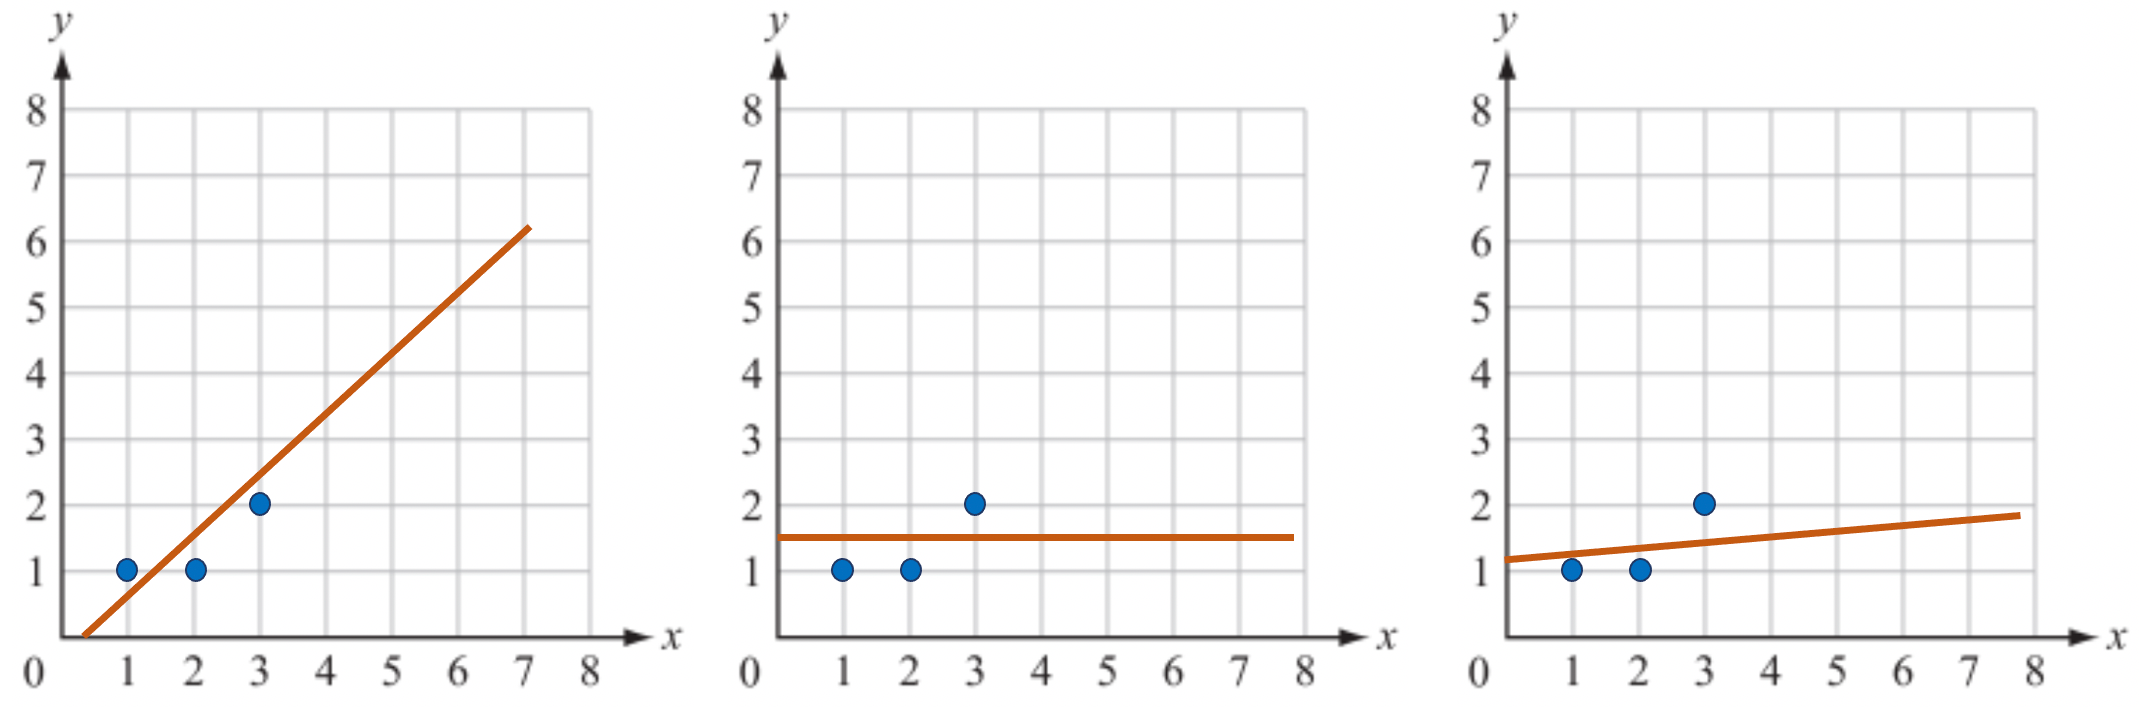

Recall that any line can be described with its slope and y-intercept. The classic generic representation of a line is given by: $$y = mx+b$$

Having an equation allows us to plug a value in for our feature variable, $x$, and generate a value of the response variable, $y$. 

To use a simple linear regression to model your data means that you are assuming a few things:
- The underlying relationship between feature and response is LINEAR
- The data you have (assuming it does not lie in a perfectly straight line) is noisy and that "noise" is normally distributed about the true line.
- Data is independent 

### Method of Least Squares

Assuming that we do have a linear relationship, that means that all of the response values in our data set are given by an equation of the form: $$Y = \beta_0+\beta_1 X + \epsilon $$

Here $Y$ represents the set of response values: $y_1, y_2, ..., y_n$ and $X$ represents the set of feature values: $x_1, x_2, ..., x_n$. 

Thus for any arbitrary $i^{th}$ data point, $y_i = \beta_0 + \beta_1 x_i +\epsilon_i$

There are some key assumptions as we develop our linear model:
- $\epsilon$ characterizes the "residual"
- Each of the $\epsilon_i$ are independent
- $\epsilon_i \sim N(0, \sigma^2)$

<div>
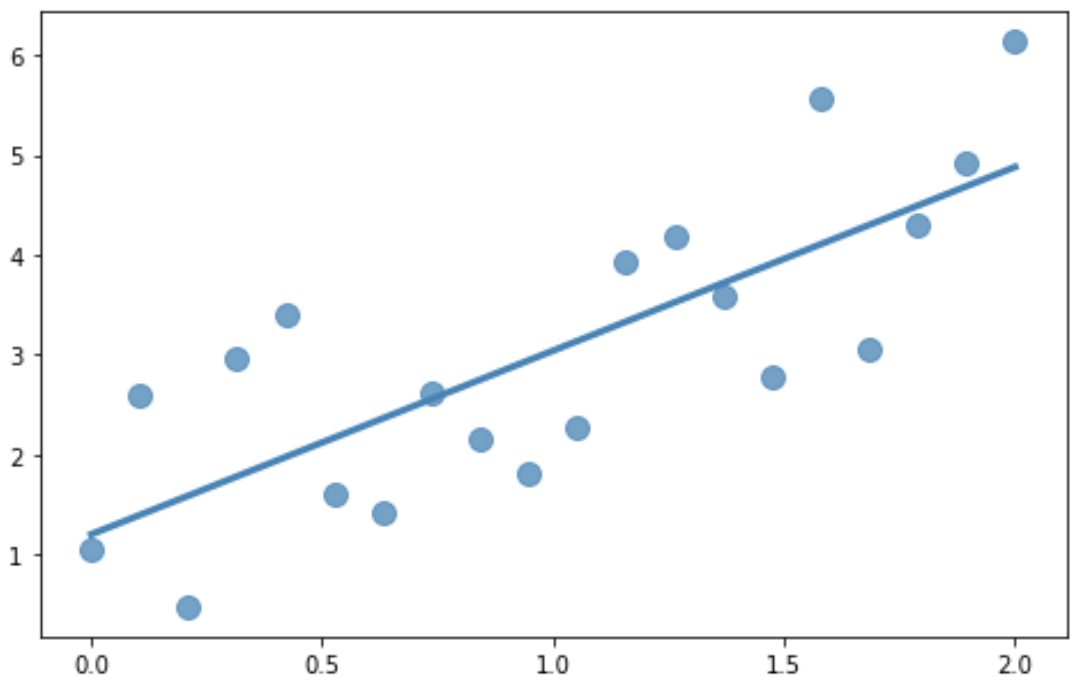
<div>


How do we find a line through the data? And once we have a line, how do we quantify how good it is at describing the data?

Let's tackle the first question:

We want to figure out the regression line: $y = \beta_0+\beta_1 x$. The idea in fitting this line is to miniimize the residuals: $$\epsilon_i = y_i - (\beta_0+\beta_1 x_i) $$

<div>
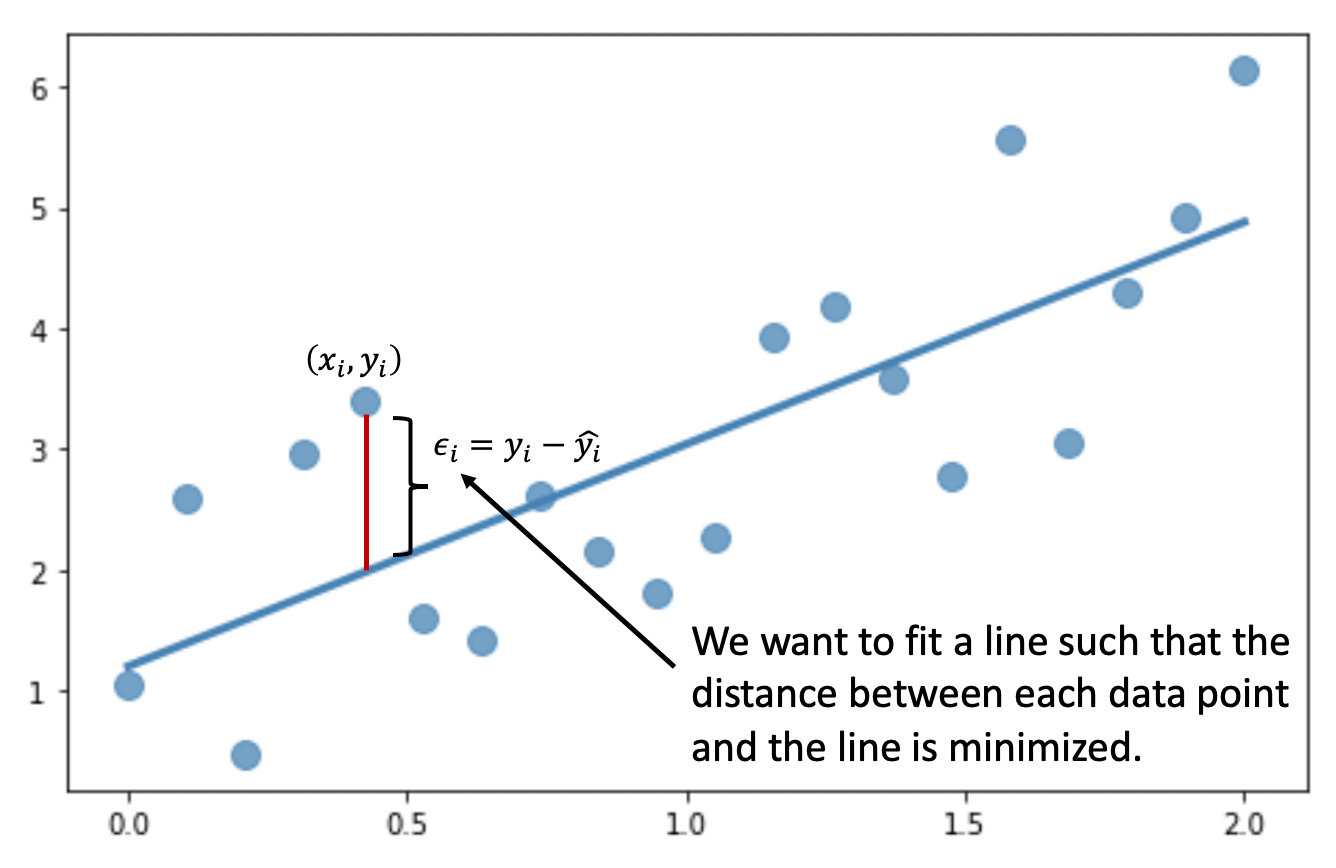
<div>
   
   
This is where the Sum of Squared-Errors(SSE) and the name "Least Squares" comes in.

The SSE for the points $(x_1, y_1), (x_2, y_2), ... , (x_n, y_n)$ is given by $$ \displaystyle \text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$

We seek to minimize this sum. How will we do that? -Calculus!!

$$ \text{SSE} = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 $$

- **The derivative with respect to $\beta_0$**

\begin{align*}
\frac{\delta SSE}{\delta \beta_0} &= \sum_{i=1}^n 2(y_i - (\beta_0+\beta_1 x_i)(-1) \\
                                  &= -2 \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)
\end{align*}

- Next, we set the derivative with respect to $\beta_0$ equal to 0 and solve for $\beta_0$.

\begin{align*}
-2 \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i) &= 0 \\
   \sum_{i=1}^n y_i - \sum_{i=1}^n \beta_0 - \sum_{i=1}^n \beta_1 x_i &= 0 \\
   n \bar{y} - \beta_0 n - \beta_1 \bar{x} n = 0 \\
   \bar{y} - \beta_0 - \beta_1 \bar{x} &= 0 \\
   -\beta_0 &= -\bar{y} + \beta_1 \bar{x}
\end{align*}

- Thus, $ \fbox{$\beta_0 = \bar{y} - \beta_1 \bar{x}$} $

- **The derivative with respect to $\beta_1$**

\begin{align*}
\frac{\delta SSE}{\delta \beta_1} &= \sum_{i=1}^n 2(y_i-(\beta_0+\beta_1 x_i))(-x_i) \\
                                  &= -2 \sum_{i=1}^n (x_i y_i - \beta_0 x_i - \beta_1 x_i^2))
\end{align*}

- Next, we set the derivative with respect to $\beta_1$ equal to 0 and solve for $\beta_1$.

\begin{align*}
-2 \sum_{i=1}^n (x_i y_i - \beta_0 x_i - \beta_1 x_i^2)) &= 0 \\
    \sum_{i=1}^n x_i y_i - \beta_0 \sum_{i=1}^n x_i - \beta_1 \sum_{i=1}^n x_i^2 &= 0 \\
    n \overline{xy} - \beta_0 n \overline{x} - \beta_1 n \overline{x^2} &= 0 \\
    \overline{xy} - \beta_0 \overline{x} - \beta_1 \overline{x^2} &= 0 \\
    -\beta_1 \overline{x^2} &= -\overline{xy}+\beta_0 \overline{x} \\
    \beta_1 &= \frac{\overline{xy}}{\overline{x^2}}- \frac{\beta_0 \overline{x}}{\overline{x^2}}
\end{align*}

- Plugging in the expression for $\beta_0$ that we derived above, we find that $\fbox{$\beta_1 = \frac{\overline{xy}-\overline{x}\cdot \overline{y}}{\overline{x^2}-(\overline{x})^2}$}$

**Exercise 1**: Find the ordinary least squares regression line through the points: $(2, 1), (3, 3), (4, 3)$

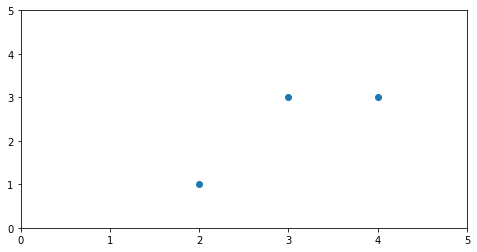

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8,4))

x = [2,3,4]
y = [1,3,3]

ax.scatter(x,y)
ax.set_xlim(0,5)
ax.set_ylim(0,5)
plt.show()

$\hat{\beta_0} = \overline{y}-\hat{\beta_1} \overline{x} $

$\hat{\beta_1} = \frac{\overline{x} \cdot \overline{y} - \overline{xy}}{(\overline{x})^2 - \overline{x^2}}$

$\overline{x} = \frac{2+3+4}{3} = 3$

$\overline{y} = \frac{1+3+3}{3} = \frac{7}{3} $

$\overline{x^2} = \frac{2^2+3^2+4^2}{3} = \frac{4+9+16}{3} = \frac{29}{3} $

$\overline{xy} = \frac{2 \cdot 1 + 3 \cdot 3 + 4 \cdot 3}{3} = \frac{2+9+12}{3} = \frac{23}{3}$

$ \overline{x} \cdot \overline{y} = 3 \cdot \frac{7}{3} = 7 $

Using the quantities defined above, we find that $$ \hat{\beta_1} = \frac{7-\frac{23}{3}}{9-\frac{29}{3}} = 1$$ 

$$\hat{\beta_0} = \frac{7}{3} - 1 \cdot 3 = -\frac{2}{3} $$

In [2]:
# Now, let's check our work using the stats.linregress

import scipy.stats as stats

beta1, beta0, rvalue, pvalue, stderr = stats.linregress(x,y)

In [3]:
beta1

1.0

In [4]:
beta0

-0.6666666666666665

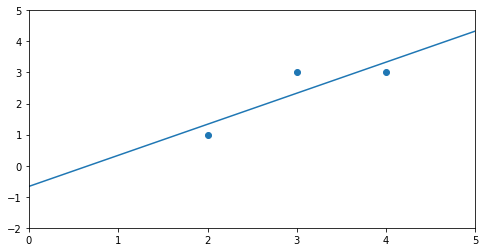

In [5]:
import numpy as np

fig, ax = plt.subplots(figsize = (8,4))

x = [2,3,4]
y = [1,3,3]

xx = np.linspace(0,5,10)
ax.scatter(x,y)
ax.plot(xx,beta0+beta1*xx)
ax.set_xlim(0,5)
ax.set_ylim(-2,5)
plt.show()

---

## Section 2: Finding a Regression line using Python

---

We will use `scipy.stats.linregress` to find our regression coefficients from here on out as computing a regression line by hand is a bit tedious. 

Let's first unpack the values that this function returns. 

- slope: This is equivalent to the $\beta_1$ value that we derived earlier. It's the slope of the regression line

- intercept: This is equivalent to the $\beta_0$ value that we derived earlier. It's the y-intercept of the regression line (value of the response when the feature = 0)

- rvalue: This is the correlation coeffient.

- pvalue: This is the pvalue (probability value) for a hypothesis test about the slope coefficient. Specifically, if we assumed a null hypothesis of $\beta_1 = 0$, the pvalue would represent the probability of observing a slope coefficient at least as extreme as the one computed given the assumption that the true slope is 0.

- stderr: This gives the "standard error" of the slope coefficient, $\beta_1$.

- intercept_stderr: This gives the "standard error" of the intercept coefficient, $\beta_0$

---

First, we will use stats.linregress on a toy data set. Then we will cover the meaning of rvalue, pvalue, and stderr.

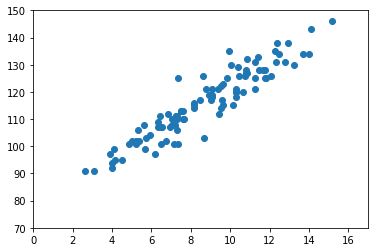

In [6]:
# Let's generate our own data. That way, we KNOW the true underlying "signal"

# file generation code:

import pandas as pd
np.random.seed(712)

#beta0star is the intercept 
beta0star = 80
#beta1star is the slope
beta1star = 4.2
#sigma represents the standard deviation
sigma = 4

# Create n=100 data values
n = 100

# We are creating the feature variable (foot_size) by taking a random sample from
# the normal distribution with mean = 8.63 and standard deviation = 3
foot_size = stats.norm.rvs(loc=8.63, scale=3, size=n)

# We are creating the response variable (IQ) by using a linear model and adding noise. 
# The noise is created by taking random samples from the normal disstribution with
# mean = 0 and standard deviation equal to sigma.
IQ = beta0star + beta1star*foot_size + stats.norm.rvs(loc=0, scale=sigma, size=n)
IQ = IQ.astype(int)

plt.scatter(foot_size, IQ)
plt.xlim([0,17])
plt.ylim([70,150])
plt.show()

dfFoot = pd.DataFrame(data={'Foot Length':foot_size, 'IQ':IQ})
dfFoot.to_csv("footsize.csv", index=False)

**Exercise 2:** Let's start with loading in `footsize.csv` into a Pandas Dataframe

In [7]:
# Load data file here.

dfFoot = pd.read_csv('footsize.csv')
dfFoot.head()

Foot Length   IQ
0     6.461958  111
1     9.558760  122
2     8.454617  117
3    10.023110  130
4     2.612190   91

Use Python and it's statistics library to carry out a simple linear regression with `foot_size` as the feature and `IQ` as the response. Give the regression model in the form $Y = \beta_0 + \beta_1 x$

In [8]:
beta1, beta0, rvalue, pvalue, stderr = stats.linregress(dfFoot["Foot Length"],dfFoot["IQ"])

print("beta1 = ", beta1)
print("beta0=", beta0)

print("Y = {:.3f} + {:.3f}X".format(beta0, beta1))

beta1 =  4.3053424099477775
beta0= 78.67898030196949
Y = 78.679 + 4.305X


**Exercise 3:** Now, make a scatterplot of the data from the `footsize.csv` file and overlay the regression line. Put "Foot Length" on the horizontal axis and "Intelligence Quotient" on the vertical axis.

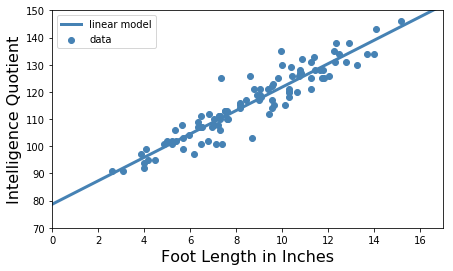

In [9]:
# Scatter plot with regression line

x_feet = np.arange(0,17,0.1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.plot(x_feet, beta0 + beta1*x_feet, color="steelblue", lw=3, label='linear model')
plt.scatter(dfFoot["Foot Length"], dfFoot["IQ"], color="steelblue", label='data')
plt.legend()
ax.set_xlabel("Foot Length in Inches", fontsize=16)
ax.set_ylabel("Intelligence Quotient", fontsize=16)
ax.set_xlim([0,17])
ax.set_ylim([70,150])
plt.show()

Let's now give some physical interpretations of the coefficients involved in our model.

- $\hat{\alpha}$ is the estimate of a person's IQ given a 0 inch length foot.

- $\hat{\beta}$ is the estimate for the increase in IQ points for each additional 1 inch in foot length.

- The relationship between these two variables is positive.

---

Can we make predictions?

Let's predict the IQ of Shaquille O'Neal. Shaq's feet are 16.14 inches long. 

---

In [10]:
y = beta0 + beta1*16.14
print("y(16.14) = {:.3f} IQ points".format(y))

y(16.14) = 148.167 IQ points


Note: According to Google, Shaq's IQ score is 101.

---

## Section 3: Determining goodness of fit. 

---

- ### What is the Coefficient of Determination? 
- ### What is the Correlation Coefficient? 
- ### Residuals?

---

### $R^2$ is the coefficient of determination. 

It is a value between 0 and 1

$$R^2 = 1 - \frac{SSE}{SST} = \frac{\texttt{SST-SSE}}{\texttt{SST}} = \frac{\texttt{Variance explained by model}}{\texttt{Total Variance}}$$

Sum of Squared Errors (SSE) can be though of as a measure of how much variation is left  ***unexplained*** by the model.
- $ \displaystyle SSE = \sum_{i=1}^n (y_i-\hat{y_i})^2 $

Regression Sum of Squares (SSR) gives a sense of how much variation is explained by the model.
- $ \displaystyle SSR = \sum_{i=1}^n (\hat{y_i}-\bar{y})^2 $

Total Sum of Squares (SST) is a measure of the total amount of variation in observed $Y$ values.
- $ \displaystyle SST = \sum_{i=1}^n (y_i - \bar{y})^2 $

<div>
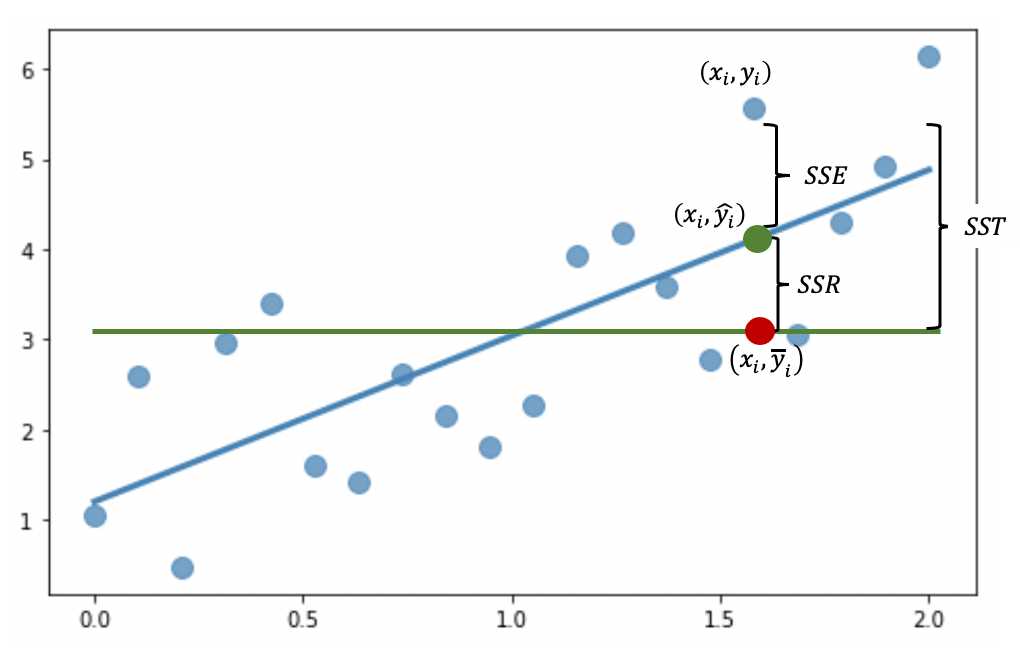
<div>
    

We could compute this value by hand....

**Or, we could take the rvalue given by stats.linregress and square it instead!**


<div>
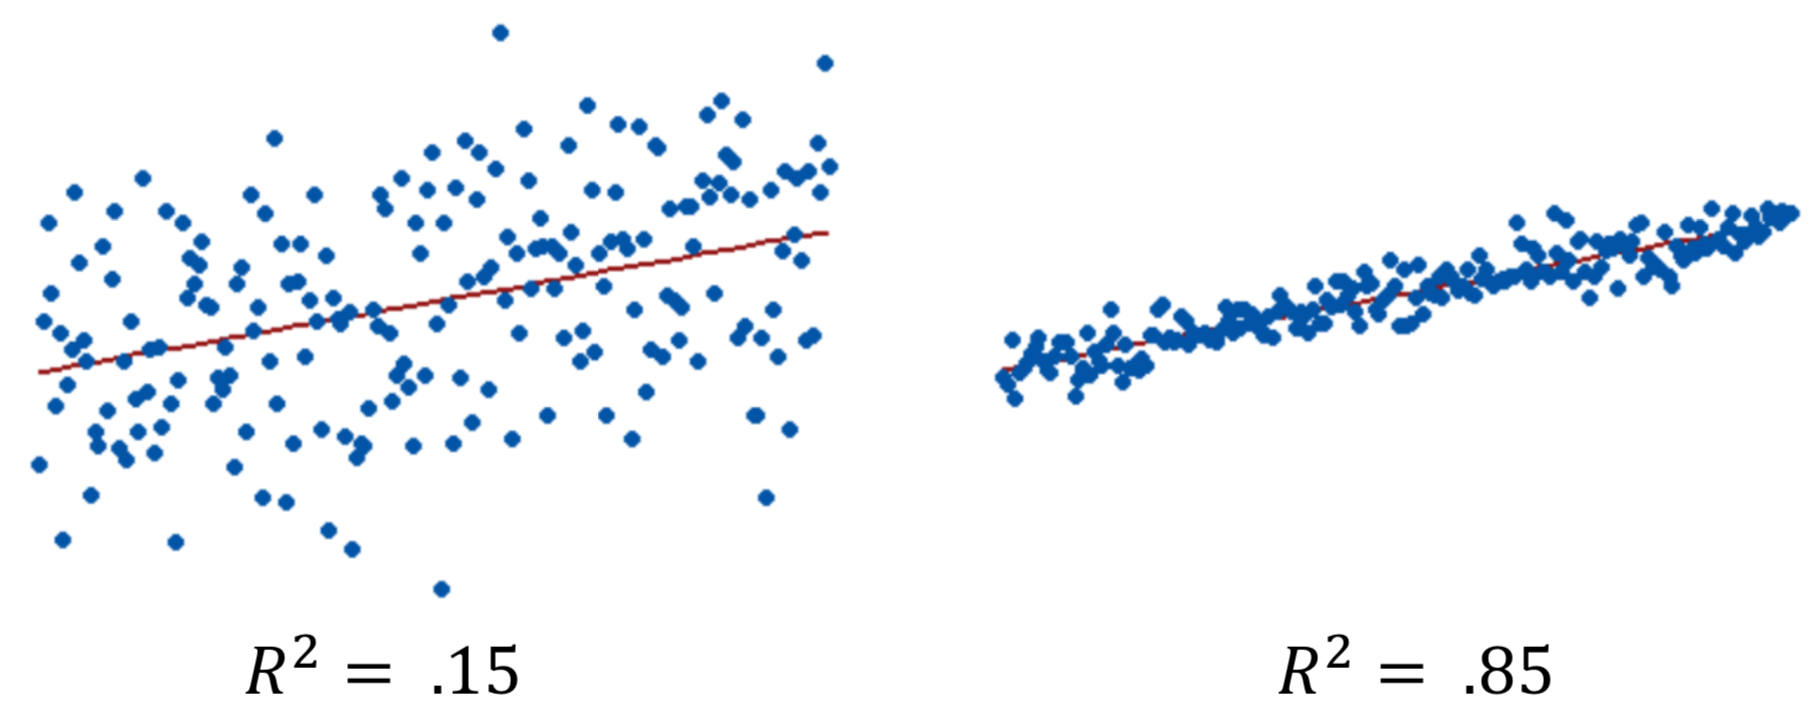
<div>
    

    
A general rule of thumb is that the larger $R^2$ is, the better fit our line is. However, we still need to be cautious.

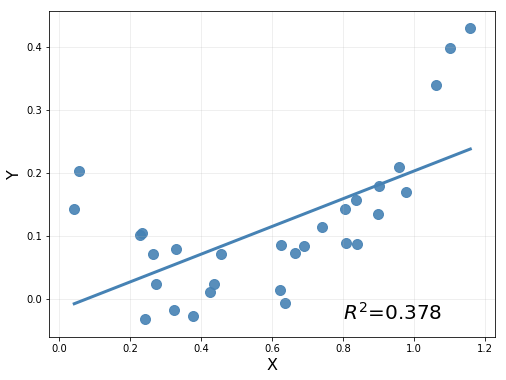

In [13]:
#Consider the following graph:

# Generate Data
n, sig = 30, 0.05
x = np.linspace(0,1,n) + 0.2*np.random.rand(n)
y = 0.25 - x + x**2 + stats.norm.rvs(0,sig,size=n)

# Fit SLR model 
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

# Plot data and SLR model 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
xplot = np.linspace(np.min(x), np.max(x))
ax.plot(xplot, ahat + bhat*xplot, color="steelblue", lw=3)
ax.scatter(x, y, color="steelblue", s=100, alpha=0.9)
ax.grid(alpha=0.25)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.text(0.8, np.min(y)+.00, r"$R^2$={:.3f}".format(rval**2), fontsize=20);

The $R^2$ value doesn't tell us if we are using the correct model or not. In the example above, the scatterplot was generated from a quadratic function (with noise). Maybe we would have a better fit if we used a quadratic model instead of a linear model.

### Gaining insight with Residuals

A residual is defined to be the difference in the $y$-value of the observed data and the linear regression estimate, or more formally: $$ r_i = y_i - \hat{y_i} $$

Plotting the residuals for each data point can give us some additional insight as to whether we've chosen a good model or not.

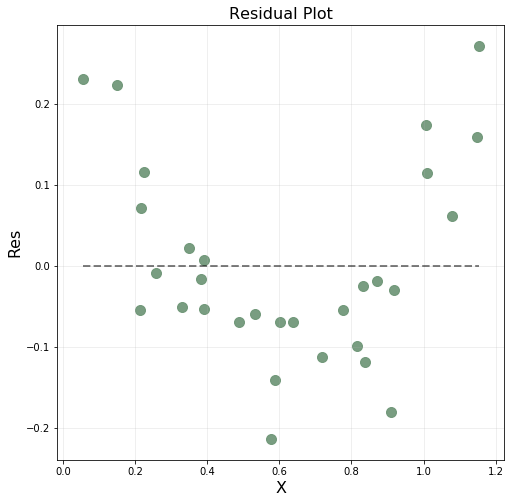

In [18]:
# Plot data/fit 
    
n, sig = 30, 0.05
x = np.linspace(0,1,n) + 0.2*np.random.rand(n)
y = 0.25 - x + x**2 + stats.norm.rvs(0,sig,size=n)    
    
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

residuals = y-(ahat+bhat*x)
    
# Plot residuals 
fig, ax = plt.subplots(figsize = (8,8))
ax.plot([np.min(x), np.max(x)], [0, 0], lw=2, ls="--", alpha=0.5, color="black")
ax.scatter(x, residuals, color="#6a9373", s=100, alpha=0.9)
ax.grid(alpha=0.25)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Res", fontsize=16)
ax.set_title("Residual Plot", fontsize=16)
    
plt.show()  

If the data was truly linear, we would expect the plot of the residuals to be normally distributed about 0. 

There is a clear pattern in the residuals above. First we have positive residuals, then negative residuals, then positive residuals again!

This is an indication that a linear model might not be a good idea.

### Coefficient of Correlation

This is the rvalue reported by stats.linregress. The correlation coefficient ranges in values from -1 to 1.

- Positive correlation (r close to +1)
- Negative correlation (r close to -1)
- No correlation (r close to 0)


Please note that the $r_i$ used to represent the residual is different than the $r$ used to describe the correlation coefficient here.

### Summary of Simple Linear Regression

- Plot your data as a scatterplot
- Does there appear to be a linear relationship?
- Compute the regression coefficients (slope and intercept) to find the least squares best fit line.
- Look at $R^2$ value.
- Look at a plot of the residuals
- Do hypothesis testing on the slop coefficient. (Not covered in this lesson)

---

## Section 4: Multiple Linear Regression

---

<div>
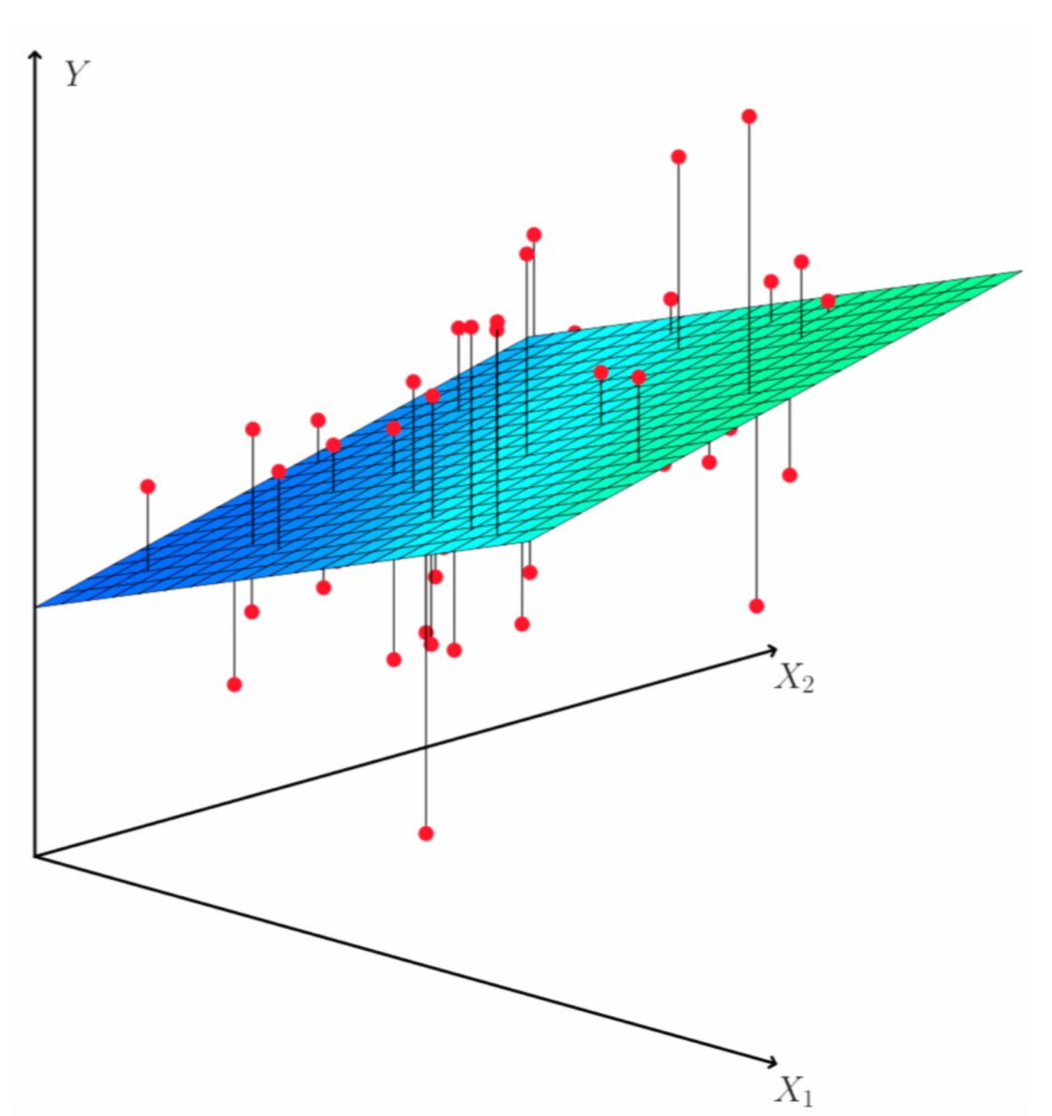
<div>
    

For Multiple Linear Regression, instead of defining a line we are defining something more complex. If we had 2 features and 1 response, we can visualize what's going on by thinking in terms of the image above.

A generic MLR model is as shown here:
$$ y_i = \beta_0 + \beta_1 x_{i1}+\beta_2 x_{i2} + ... + \beta_p x_{ip} + \epsilon_i $$

Here the $i$ refers to the specific data point we are looking at (out of $n$ data points typically). The $p$ refers to how many features we have.

In the image above, there are two features, so a generic MLR model would look like: $\hat{y_i} = \beta_0+\beta_1 x_{i1} + \beta_2 x_{i2} $

**Exercise 4:** Consider the following model for house sale price: $$Y = 15+50x_1+25x_2+0.1x_3$$

where $x_1$ = square footage, $x_2$ = num bedrooms, and $x_3$ = num new appliances.

What would we predict as a selling price for a 2500 sq foot house with 3 bedrooms and 5 new appliances?

**Solution:** $(x_1, x_2, x_3, Y) = (2500, 3, 5, Y)$

$$Y = 15+50 \times 2500 + 25 \times 3 + 0.1 \times 5 $$

In [19]:
15+50*2500+25*3+0.1*5

125090.5

### Solving for the parameters

Just like with Simple Linear Regression, we solve for the parameters by minimizing the Sum of the Squared Errors (note these are really the squared residuals).

$$ SSE = \sum_{i=1}^n (y_i - (\hat{\beta_0}+\hat{\beta_1}x_1 +\hat{\beta_2}x_2 + ... + \hat{\beta_p}x_p))^2 $$

How do we solve for the coefficients?

- We can solve them with linear algebra - but this can be computationally expensive.

- Typically some sort of iterative method is used, like **gradient descent**

The general idea is that we make a starting guess as to what the parameters are, compute partial derivatives and make incremental moves "downhill" towards the minimum. 


<div>
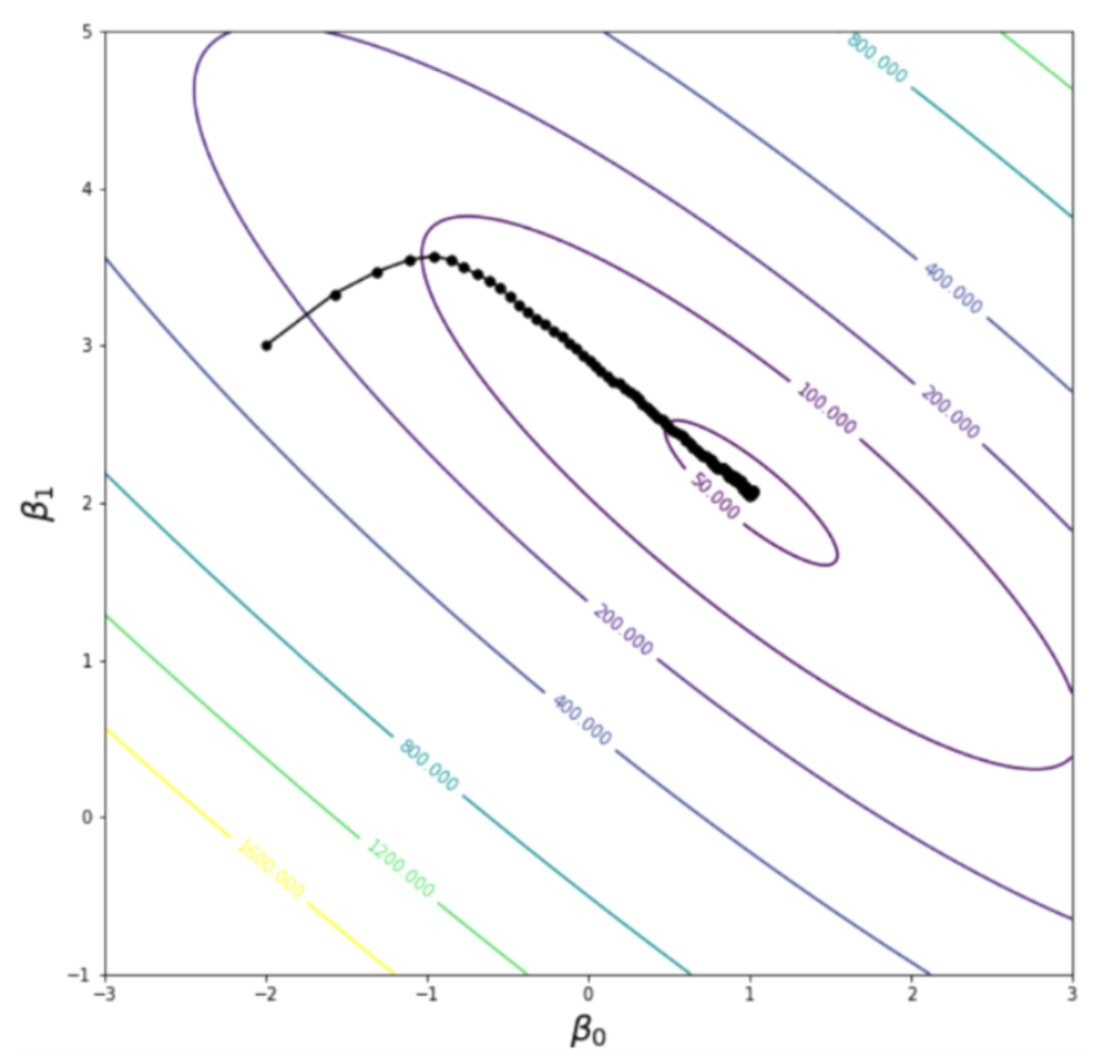
<div>
    

This is getting into some Machine Learning territory. We will not go further in our study of how the coefficients are computed. Instead, we will make Python do the computational work with a new package!

We'll be using statsmodels: https://www.statsmodels.org/stable/index.html

In [20]:
import statsmodels.api as sm

**Exercise 5**: Let's read in a new data file and learn the python syntax for how to fit a multiple linear regression model. The following data set was obtained from the University of Sheffield: https://www.sheffield.ac.uk/mash/statistics/datasets

"This dataset contains information on new born babies and their parents.  It contains mostly continuous variables (although some have only a few values e.g. number of cigarettes smoked per day) and is most useful for correlation and regression.  The birthweights of the babies who mothers smoked have been adjusted slightly to exaggerate the differences between mothers who smoked and didn’t smoke so students can see the difference more clearly in a scatterplot with gestational age and scatter colour coded by smoking status."   

<div>
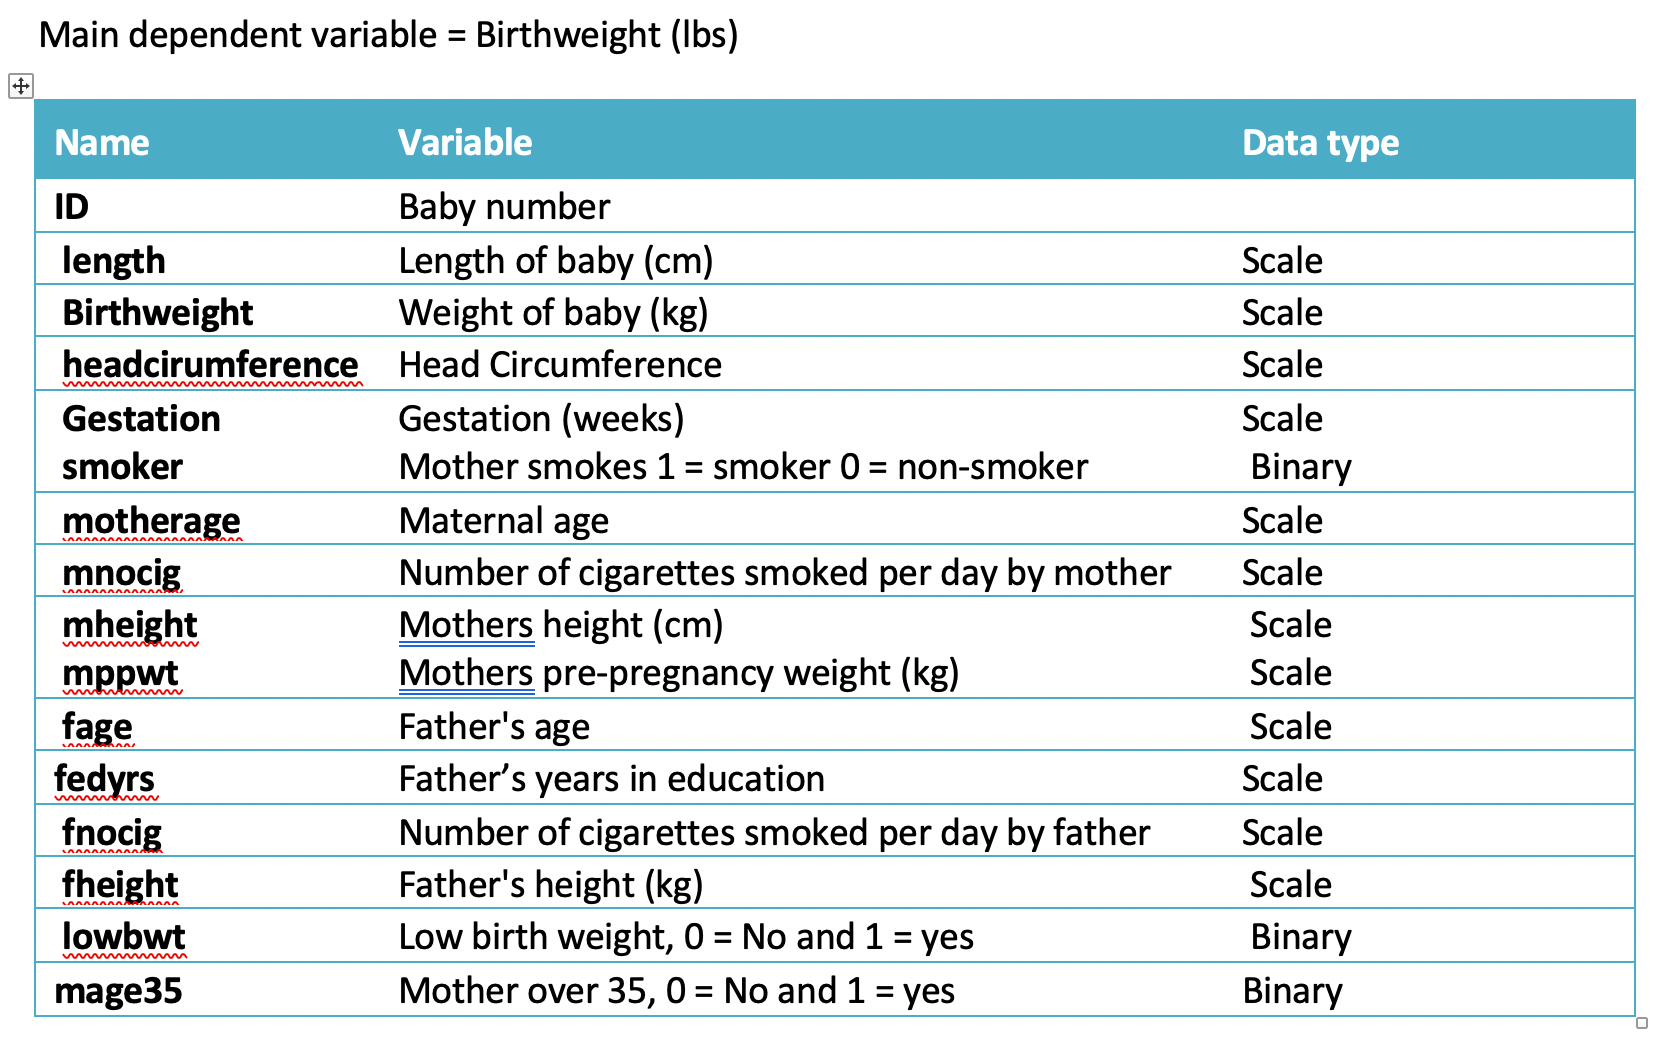
<div>

In [36]:
file = pd.read_csv("Birthweight.csv")

dfW = pd.DataFrame(file)
dfW = dfW.dropna()
dfW.columns

Index(['ID', 'Length', 'Birthweight', 'Headcirc', 'Gestation', 'smoker',
       'mage', 'mnocig', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig',
       'fheight', 'lowbwt', 'mage35'],
      dtype='object')

In [38]:
# Collect the features in a 2D array 
X = dfW[["Length", "Headcirc", "Gestation"]]

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = dfW["Birthweight"]

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Birthweight   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     31.50
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           2.12e-10
Time:                        13:56:04   Log-Likelihood:                -11.680
No. Observations:                  42   AIC:                             31.36
Df Residuals:                      38   BIC:                             38.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0410      0.980     -6.162      0.000      -8.026      -4.056
Length         0.0477      0.028      1.710      0.096      -0.009       0.104
Headcirc       0.1004      0.026      3.794      0.001       0.047       0.154
Gestation      0.0876      0.028      3.129      0.003       0.031       0.144
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.628
Skew:                           0.233   Prob(JB):                        0.730
Kurtosis:                       2.625   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
model.params

const       -6.040954
Length       0.047687
Headcirc     0.100385
Gestation    0.087599
dtype: float64

Thus, our MLR model is:

$$ \hat{Y} = -6.041 + 0.0477 \times \texttt{Length} + 0.1 \times \texttt{Headcirc} + 0.086 \times \texttt{Gestation} $$

---

## Section 5: How can we analyze our MLR model?

---

1) We can compute the correlation coefficient between pairs of features using the .corr() function.

In [41]:
dfW[["Length", "Headcirc", "Gestation"]].corr()

Length  Headcirc  Gestation
Length     1.000000  0.563172   0.705111
Headcirc   0.563172  1.000000   0.404635
Gestation  0.705111  0.404635   1.000000

2) We can look at the p-values associated with each coefficient.

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Birthweight   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     31.50
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           2.12e-10
Time:                        14:19:55   Log-Likelihood:                -11.680
No. Observations:                  42   AIC:                             31.36
Df Residuals:                      38   BIC:                             38.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0410      0.980     -6.162      0.000      -8.026      -4.056
Length         0.0477      0.028      1.710      0.096      -0.009       0.104
Headcirc       0.1004      0.026      3.794      0.001       0.047       0.154
Gestation      0.0876      0.028      3.129      0.003       0.031       0.144
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.628
Skew:                           0.233   Prob(JB):                        0.730
Kurtosis:                       2.625   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# The pvalues are indexed starting at 0 for the constant and incrementing up by 1 for each coefficient.
model.pvalues[1]

0.09550728524796458

### But, what is a p-value?


<div>
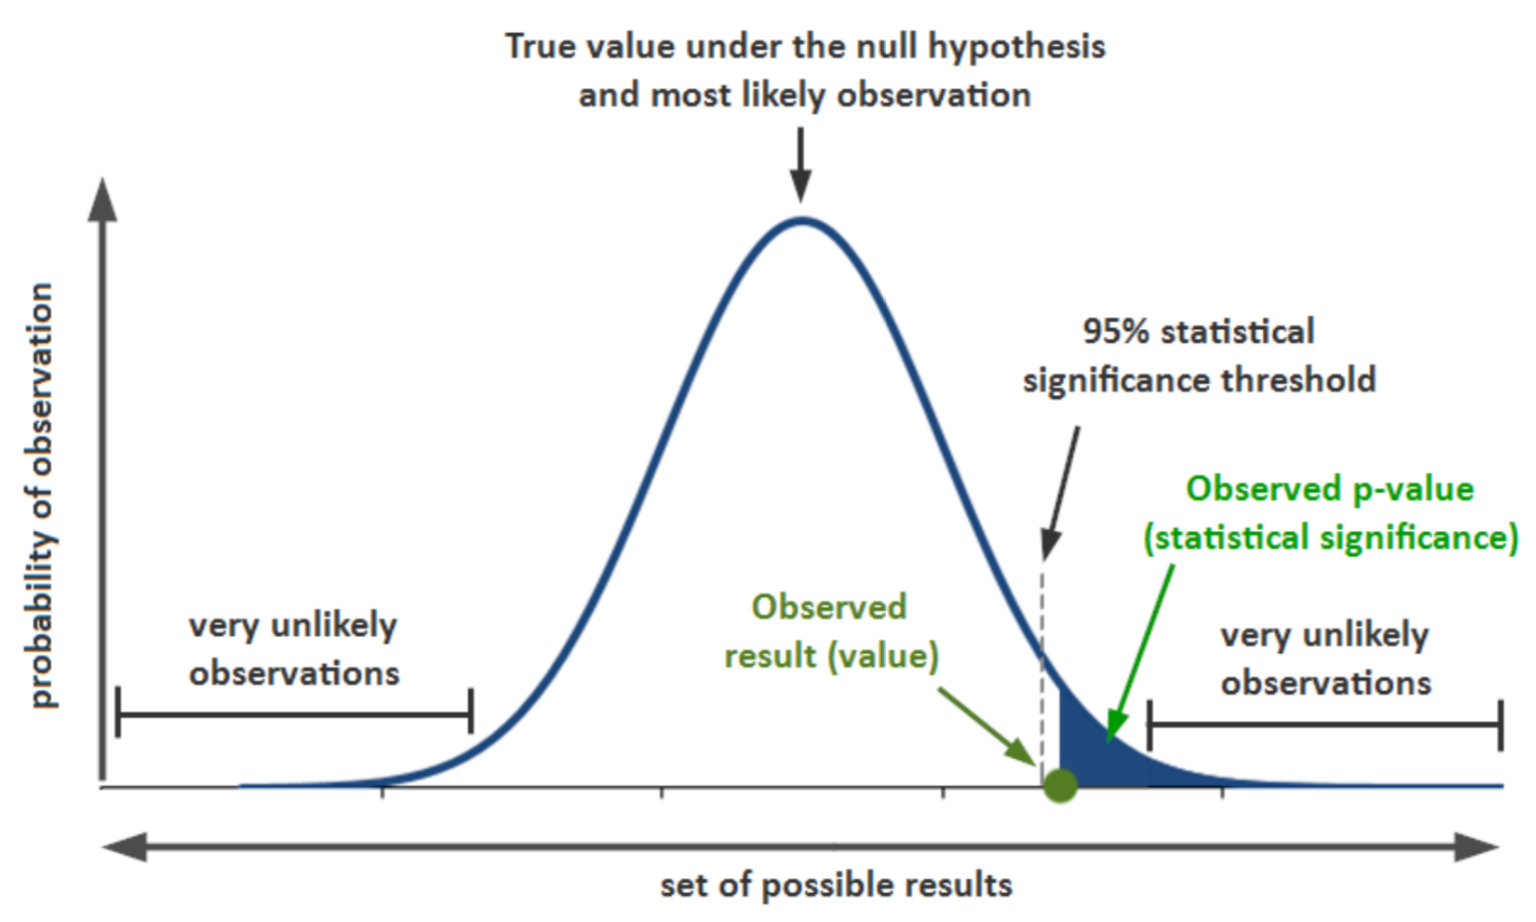
<div>
    
image source: https://blog.analytics-toolkit.com/2017/statistical-significance-ab-testing-complete-guide/

A **p-value** is the probability, under the Null Hypothesis, that we would get a test statistic at least as extreme as the one we calculated.

In the context of coefficientsfor regression, the null hypothesis is assuming no relationship between a particular feature and the response. The p-value is a measure of the probability of observing a slope of the magnitude reports by statsmodels. 

- A small p-value suggests we should "reject the null hypothesis" in favor of the alternative (there is a relationship between feature and response).
- A large p-value suggests that we should "fail to reject the null hypothesis" and conclude that there is not evidence of a relationship between feature and response.

Common thresholds for the p-values are $\alpha = 0.05,$ and $\alpha = 0.01$

**Exercise 6:** Based on that criteria alone, which features might have a relationship with the response and which might not?

In [48]:
print("P-value for Length coefficient:",model.pvalues[1])
print("P-value for Headcirc coefficient:",model.pvalues[2])
print("P-value for Gestation coefficient:",model.pvalues[3])

P-value for Length coefficient: 0.09550728524796458
P-value for Headcirc coefficient: 0.0005177746445136089
P-value for Gestation coefficient: 0.0033595563770948654


Based on these results, we might conclude that we could make a model to predict "Birthweight" without the "Length" feature.

### Issues with only looking at p-values

When performing a MLR, you should be aware of the Problem of Multiple Comparisons. The idea is that is we are looking for a statistically significant relationship between many features and the response, we may find that one of the features is important just by random chance.

Suppose we have 20 features that were generated randomly.

If we are looking at p-values that fall below $\alpha = 0.05$ significance level, then we can expect 95% of those 20 features to have a p-value larger than $\alpha$ and 5% of the features to _by random chance_ have a p-value less than $\alpha$.

So while the p-values associated with the coefficients can be useful to look at, they shouldn't be the only thing you analyze.

### F-statistic

In general, with MLR we are trying to determine the following:
- Is at least one of the features useful in predicting the response?
- Do all of the features help explain the response? Or can we reduce our model to fewer features.
- How well does the model fit the data?

To determine if at least one feature is useful in predicting the response we set up the following Hypothesis Test:

\begin{align*}
H_0 &: \beta_1 = \beta_2 = ... = \beta_p = 0 \\
H_1 &: \beta_k \neq 0 \text{for at least one value of k in 1, 2, ..., p} 
\end{align*}

The null hypothesis is stating that there is no useful linear relationship between the response and any of the features.

To perform the hypothesis test, we compute a quantity called the F-statistic. Then we compute the p-value associated with the F-statistic.

F-test: $ \displaystyle F = \frac{\frac{SST-SSE}{p}}{\frac{SSE}{n-p-1}} $

- $p$ is the number of features
- $n$ is the number of data points

Let's look at the model summary output again. statsmodels conveniently computes the F-statistic for us!

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Birthweight   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     31.50
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           2.12e-10
Time:                        14:57:13   Log-Likelihood:                -11.680
No. Observations:                  42   AIC:                             31.36
Df Residuals:                      38   BIC:                             38.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0410      0.980     -6.162      0.000      -8.026      -4.056
Length         0.0477      0.028      1.710      0.096      -0.009       0.104
Headcirc       0.1004      0.026      3.794      0.001       0.047       0.154
Gestation      0.0876      0.028      3.129      0.003       0.031       0.144
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.628
Skew:                           0.233   Prob(JB):                        0.730
Kurtosis:                       2.625   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A large F-statistic indicates that at least one feature has a statistically significant effect on the response. The F-statistic that we have =31.5. It's associated p-value is 2.12e10, which is tiny. This is indicative that at least one of the features Length, HeadCirc, and Gestation have a statistically significant relationship with the repsonse.

### R^2: Coefficient of determination

The model summary also computes the $R^2$ value for us. Note that $R^2=0.713$ which denotes a reasonably strong relationship between features and coefficients.

---

## Section 6: Fit a polynomial model using MLR techniques.

---

Here, let's go back to our discussion about residuals. 

Remember this plot?

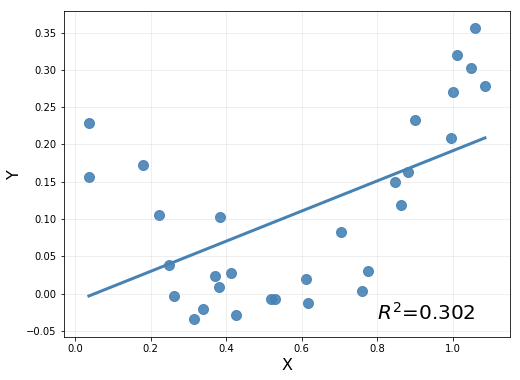

In [50]:
#Consider the following graph:

# Generate Data
n, sig = 30, 0.05
x = np.linspace(0,1,n) + 0.2*np.random.rand(n)
y = 0.25 - x + x**2 + stats.norm.rvs(0,sig,size=n)

# Fit SLR model 
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

# Plot data and SLR model 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
xplot = np.linspace(np.min(x), np.max(x))
ax.plot(xplot, ahat + bhat*xplot, color="steelblue", lw=3)
ax.scatter(x, y, color="steelblue", s=100, alpha=0.9)
ax.grid(alpha=0.25)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.text(0.8, np.min(y)+.00, r"$R^2$={:.3f}".format(rval**2), fontsize=20);

**Exercise 7:** We will fit a polynomial model by thinking of the polynomial features as features in an MLR model.

$$x_1 = x, x_2=x^2 $$

From the generative code above, our original parabola is: $y=\frac{1}{4}-x+x^2$

We seek a MLR model of the form: $$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 
$$

We expect $\beta_0 \approx \frac{1}{4}, \beta_1 \approx -1,$ and $\beta_2 \approx 1$.

In [51]:
# Collect the linear feature x and it's square in an array 
X = np.column_stack((x, x**2))

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Fit the ordinary least-squares (OLS) model 
polymodel = sm.OLS(y, X).fit()

# Print estimated parameters 
print(polymodel.params)

[ 0.23956742 -0.98909789  1.00540754]


In [63]:
polymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     87.94
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.50e-12
Time:                        16:30:53   Log-Likelihood:                 51.929
No. Observations:                  30   AIC:                            -97.86
Df Residuals:                      27   BIC:                            -93.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2396      0.029      8.221      0.000       0.180       0.299
x1            -0.9891      0.114     -8.660      0.000      -1.223      -0.755
x2             1.0054      0.094     10.706      0.000       0.813       1.198
==============================================================================
Omnibus:                        0.802   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.831
Skew:                           0.236   Prob(JB):                        0.660
Kurtosis:                       2.335   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Therefore, $\hat{y} = 0.2396 -0.9891 x_1 + 1.005 x_2$, where if we think of the features $x_1$ and $x_2$ as $x$ and $x^2$ respectively, we have an equation that is pretty close to our original model.

Note that the $R^2$ value went up significantly.

**Exercise 8**: Plot the data with it's new quadratic model.

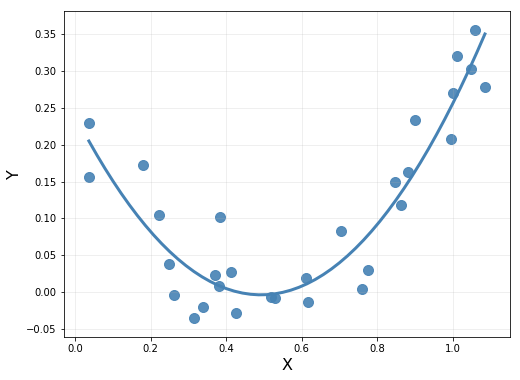

In [52]:
# Plot data and SLR model 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
xplot = np.linspace(np.min(x), np.max(x))
yplot = polymodel.params[0] + polymodel.params[1]*xplot + polymodel.params[2]*xplot**2
ax.plot(xplot, yplot, color="steelblue", lw=3)
ax.scatter(x, y, color="steelblue", s=100, alpha=0.9)
ax.grid(alpha=0.25)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16);

**Exercise 9**: Make a residuals plot using the data with it's quadratic model.

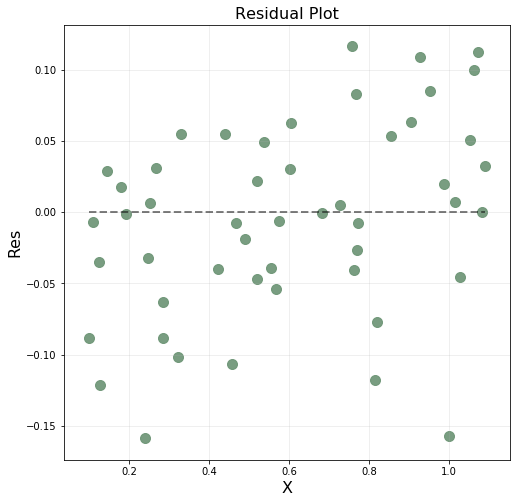

In [54]:
# Plot data/fit 
    
n, sig = 50, 0.05
x = np.linspace(0,1,n) + 0.2*np.random.rand(n)
y = 0.25 - x + x**2 + stats.norm.rvs(0,sig,size=n)    
    
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

residuals = y-yplot
    
# Plot residuals 
fig, ax = plt.subplots(figsize = (8,8))
ax.plot([np.min(x), np.max(x)], [0, 0], lw=2, ls="--", alpha=0.5, color="black")
ax.scatter(x, residuals, color="#6a9373", s=100, alpha=0.9)
ax.grid(alpha=0.25)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Res", fontsize=16)
ax.set_title("Residual Plot", fontsize=16)
    
plt.show()  

---

## Section 7: Practice with MLR

---

**Exercise 10:** Use the `Birthweight.csv` data to create a new MLR. Choose different features to include. Compare the difference in $R^2$, the $F-statistic$, and the p-values with the model that we created together.

In [55]:
dfW.columns

Index(['ID', 'Length', 'Birthweight', 'Headcirc', 'Gestation', 'smoker',
       'mage', 'mnocig', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig',
       'fheight', 'lowbwt', 'mage35'],
      dtype='object')

In [58]:
# Full Model

# Collect the features in a 2D array 
X = dfW[["Length", "Headcirc", "Gestation","smoker","mage","mnocig","mheight","mppwt","fage","fedyrs","fnocig","fheight","lowbwt","mage35"]]

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = dfW["Birthweight"]

# Fit the ordinary least-squares (OLS) model 
model_full = sm.OLS(y, X).fit()

In [59]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Birthweight   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     7.872
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           2.85e-06
Time:                        16:25:43   Log-Likelihood:                -3.7677
No. Observations:                  42   AIC:                             37.54
Df Residuals:                      27   BIC:                             63.60
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8643      2.137     -1.809      0.082      -8.249       0.520
Length         0.0443      0.035      1.255      0.220      -0.028       0.117
Headcirc       0.0887      0.029      3.028      0.005       0.029       0.149
Gestation      0.0931      0.032      2.943      0.007       0.028       0.158
smoker        -0.2194      0.169     -1.295      0.206      -0.567       0.128
mage           0.0134      0.027      0.488      0.629      -0.043       0.070
mnocig         0.0019      0.007      0.276      0.785      -0.012       0.016
mheight        0.0027      0.014      0.192      0.849      -0.027       0.032
mppwt          0.0091      0.011      0.798      0.432      -0.014       0.032
fage          -0.0078      0.019     -0.422      0.676      -0.046       0.030
fedyrs        -0.0059      0.031     -0.190      0.851      -0.070       0.058
fnocig         0.0022      0.004      0.522      0.606      -0.006       0.011
fheight       -0.0150      0.010     -1.539      0.136      -0.035       0.005
lowbwt        -0.0347      0.249     -0.139      0.890      -0.546       0.477
mage35        -0.4825      0.330     -1.461      0.155      -1.160       0.195
==============================================================================
Omnibus:                        4.364   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                2.299
Skew:                           0.311   Prob(JB):                        0.317
Kurtosis:                       2.037   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# Just lowest 5 pvalues

# Collect the features in a 2D array 
X = dfW[["Headcirc", "Gestation","smoker","fheight","mage35"]]

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = dfW["Birthweight"]

# Fit the ordinary least-squares (OLS) model 
model_full2 = sm.OLS(y, X).fit()

In [62]:
model_full2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Birthweight   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     21.26
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           7.61e-10
Time:                        16:28:52   Log-Likelihood:                -9.0473
No. Observations:                  42   AIC:                             30.09
Df Residuals:                      36   BIC:                             40.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6111      1.509     -2.393      0.022      -6.672      -0.550
Headcirc       0.1141      0.023      4.865      0.000       0.067       0.162
Gestation      0.1220      0.021      5.688      0.000       0.079       0.166
smoker        -0.1777      0.105     -1.698      0.098      -0.390       0.035
fheight       -0.0093      0.008     -1.218      0.231      -0.025       0.006
mage35        -0.2774      0.177     -1.566      0.126      -0.637       0.082
==============================================================================
Omnibus:                        1.678   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.511
Skew:                           0.338   Prob(JB):                        0.470
Kurtosis:                       2.362   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""